In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
print(sns.get_dataset_names())

['anagrams', 'anscombe', 'attention', 'brain_networks', 'car_crashes', 'diamonds', 'dots', 'exercise', 'flights', 'fmri', 'gammas', 'geyser', 'iris', 'mpg', 'penguins', 'planets', 'tips', 'titanic']


In [ ]:
tips_df = sns.load_dataset('tips')

In [ ]:
tips_df.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


**Numerical Plots**
* Distribution: Hist, KDE
* Bar Plot
* Count Plot
* Facet Plot: tạo ra một lưới 2d gồm các bảng được xác định bởi các biến tạo thành các hàng và cột.
* Box Plot: Phương pháp để mô tả bằng đồ thị các nhóm dữ liệu số thông qua các phần tư của chúng
* Join Plot
* Pair Plot
* Heat Map:một kỹ thuật trực quan hóa dữ liệu cho thấy cường độ của một hiện tượng là màu sắc ở hai chiều

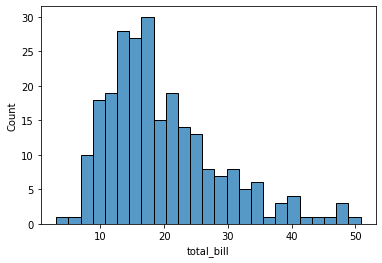

In [ ]:
sns.histplot(tips_df['total_bill'], bins=25); #bins = divide data into intervals

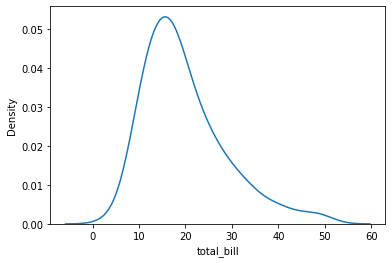

In [ ]:
sns.kdeplot(tips_df['total_bill']);


**Categorical Plots**

**Bar Plots**

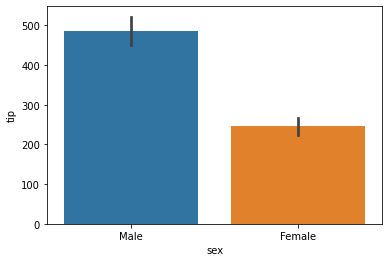

In [ ]:
#estimator by default = mean, you can pass anything you want like np.cov, np.std or even your own function
sns.barplot(x="sex", y='tip', data=tips_df, estimator=np.sum);

**Count Plot**

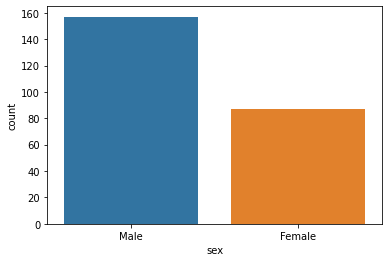

In [ ]:
sns.countplot(x='sex', data=tips_df); #Count total number of Male and Female

In [ ]:

tips_df.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


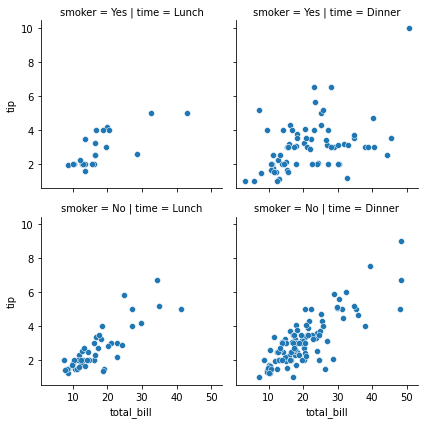

In [ ]:
tips_fg = sns.FacetGrid(tips_df, col="time", row="smoker") #Create a class instance of FacetGrid class
#tips_fg.map(sns.histplot, 'total_bill', bins=10);
tips_fg.map(sns.scatterplot, 'total_bill', 'tip');

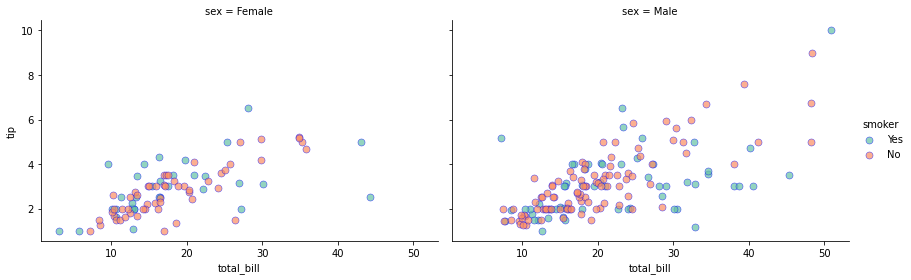

In [ ]:
kws = dict(s=50, linewidth=.5, edgecolor='b',alpha=.7) #keyword arguments

tips_fg = sns.FacetGrid(tips_df, col="sex", hue="smoker", height=4, aspect=1.5,
                        col_order=["Female", "Male"],
                        palette='Set2', #Colors to use for the different levels of the ``hue`` variable
                        legend_out=True)

tips_fg.map(sns.scatterplot, 'total_bill', 'tip', **kws)
tips_fg.add_legend();

**Box Plot**
* Box Plot is a good indication of how the values in the data are spread out ("minium", first quartile (Q1), median, third quartile (Q3), and “maximum”)

* Identify outliers
* Check if data is symmetrical
* Determine how tightly data is grouped
* Resource: https://towardsdatascience.com/understanding-boxplots-5e2df7bcbd51

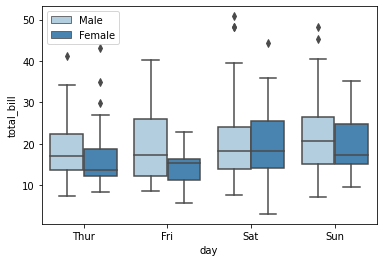

In [ ]:
sns.boxplot(x='day', y='total_bill', data=tips_df, hue='sex', palette='Blues');
#the black-dot = outliner
#palette ‘blues’ are all kinds of blue

plt.legend(loc=0); #to remove data cat

**Joint Plot**
* Joint Plot
* joint distribution between two variables along with each variable’s marginal distribution
* tyling

In [ ]:
penguins = sns.load_dataset("penguins")

In [ ]:
penguins.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female


In [ ]:
# Apply the default theme
sns.set_theme()

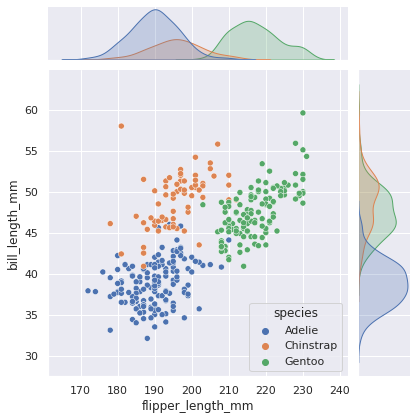

In [ ]:
sns.jointplot(data=penguins, x="flipper_length_mm", y="bill_length_mm", hue="species");

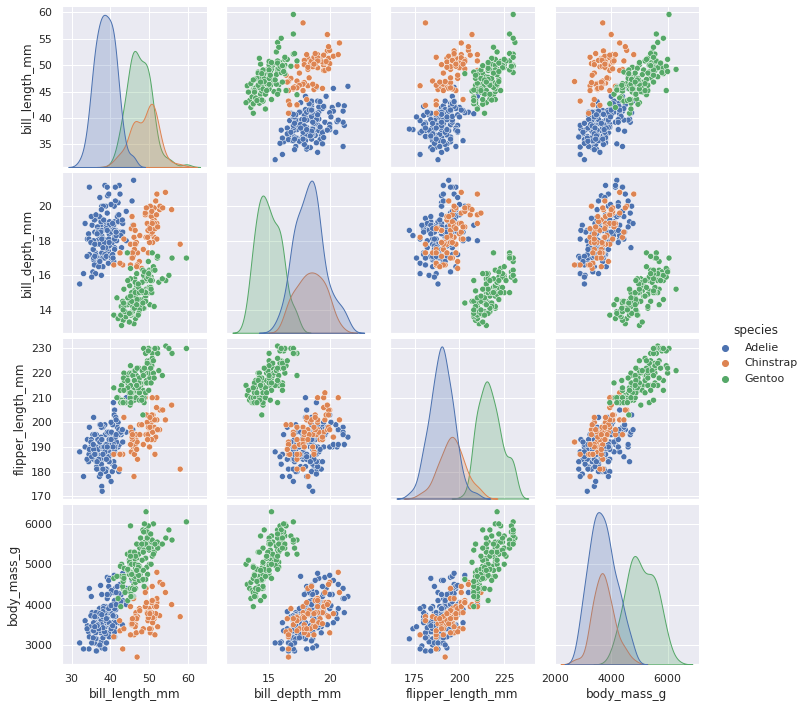

In [ ]:
sns.pairplot(data=penguins, hue="species");

**Heatmaps**

Describing density or intensity of variables, visualize patterns, variance, and even anomalies.

In [ ]:
flights = sns.load_dataset('flights')

flights.head()

,year,month,passengers
0,1949,Jan,112
1,1949,Feb,118
2,1949,Mar,132
3,1949,Apr,129
4,1949,May,121


In [ ]:
flights = pd.pivot_table(flights, index='month', columns='year',values='passengers')

In [ ]:
flights

year,1949,1950,1951,1952,1953,1954,1955,1956,1957,1958,1959,1960
month,,,,,,,,,,,,
Jan,112,115,145,171,196,204,242,284,315,340,360,417
Feb,118,126,150,180,196,188,233,277,301,318,342,391
Mar,132,141,178,193,236,235,267,317,356,362,406,419
Apr,129,135,163,181,235,227,269,313,348,348,396,461
May,121,125,172,183,229,234,270,318,355,363,420,472
Jun,135,149,178,218,243,264,315,374,422,435,472,535
Jul,148,170,199,230,264,302,364,413,465,491,548,622
Aug,148,170,199,242,272,293,347,405,467,505,559,606
Sep,136,158,184,209,237,259,312,355,404,404,463,508


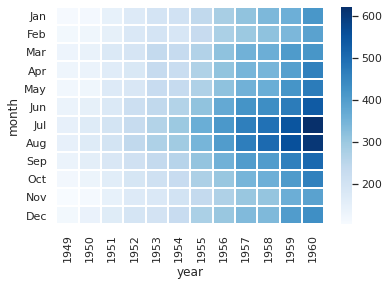

In [ ]:
sns.heatmap(flights, cmap='Blues', linecolor='white', linewidth=1);

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# read dataset
cereal_df = pd.read_csv('/content/drive/MyDrive/CodeXplore/data/cereal.csv')

In [ ]:
cereal_df.head()

,name,mfr,type,calories,protein,fat,sodium,fiber,carbo,sugars,potass,vitamins,shelf,weight,cups,rating
0,100% Bran,N,C,70,4,1,130,10.0,5.0,6,280,25,3,1.0,0.33,68.402973
1,100% Natural Bran,Q,C,120,3,5,15,2.0,8.0,8,135,0,3,1.0,1.00,33.983679
2,All-Bran,K,C,70,4,1,260,9.0,7.0,5,320,25,3,1.0,0.33,59.425505
3,All-Bran with Extra Fiber,K,C,50,4,0,140,14.0,8.0,0,330,25,3,1.0,0.50,93.704912
4,Almond Delight,R,C,110,2,2,200,1.0,14.0,8,-1,25,3,1.0,0.75,34.384843


In [ ]:
# irrelevant fields
fields = ['rating', 'shelf', 'cups', 'weight']

cereal_df_new = cereal_df.drop(fields, axis=1)
cereal_df_new.head()

,name,mfr,type,calories,protein,fat,sodium,fiber,carbo,sugars,potass,vitamins
0,100% Bran,N,C,70,4,1,130,10.0,5.0,6,280,25
1,100% Natural Bran,Q,C,120,3,5,15,2.0,8.0,8,135,0
2,All-Bran,K,C,70,4,1,260,9.0,7.0,5,320,25
3,All-Bran with Extra Fiber,K,C,50,4,0,140,14.0,8.0,0,330,25
4,Almond Delight,R,C,110,2,2,200,1.0,14.0,8,-1,25


In [ ]:
cereal_corr = cereal_df_new.corr()# get correlations

#There’s lots of redundancy in a correlation matrix;
#The upper triangle of the table has the same information as the lower.
cereal_corr

,calories,protein,fat,sodium,fiber,carbo,sugars,potass,vitamins
calories,1.000000,0.019066,0.498610,0.300649,-0.293413,0.250681,0.562340,-0.066609,0.265356
protein,0.019066,1.000000,0.208431,-0.054674,0.500330,-0.130864,-0.329142,0.549407,0.007335
fat,0.498610,0.208431,1.000000,-0.005407,0.016719,-0.318043,0.270819,0.193279,-0.031156
sodium,0.300649,-0.054674,-0.005407,1.000000,-0.070675,0.355983,0.101451,-0.032603,0.361477
fiber,-0.293413,0.500330,0.016719,-0.070675,1.000000,-0.356083,-0.141205,0.903374,-0.032243
carbo,0.250681,-0.130864,-0.318043,0.355983,-0.356083,1.000000,-0.331665,-0.349685,0.258148
sugars,0.562340,-0.329142,0.270819,0.101451,-0.141205,-0.331665,1.000000,0.021696,0.125137
potass,-0.066609,0.549407,0.193279,-0.032603,0.903374,-0.349685,0.021696,1.000000,0.020699
vitamins,0.265356,0.007335,-0.031156,0.361477,-0.032243,0.258148,0.125137,0.020699,1.000000


In [ ]:
#.ones_like can build a matrix of booleans with the same shape as our data frame
ones_corr = np.ones_like(cereal_corr, dtype=bool)
ones_corr

array([[ True,  True,  True,  True,  True,  True,  True,  True,  True],
       [ True,  True,  True,  True,  True,  True,  True,  True,  True],
       [ True,  True,  True,  True,  True,  True,  True,  True,  True],
       [ True,  True,  True,  True,  True,  True,  True,  True,  True],
       [ True,  True,  True,  True,  True,  True,  True,  True,  True],
       [ True,  True,  True,  True,  True,  True,  True,  True,  True],
       [ True,  True,  True,  True,  True,  True,  True,  True,  True],
       [ True,  True,  True,  True,  True,  True,  True,  True,  True],
       [ True,  True,  True,  True,  True,  True,  True,  True,  True]])

In [ ]:
ones_corr.shape, cereal_corr.shape

((9, 9), (9, 9))

In [ ]:
#.triu will return only the upper triangle of that matrix.

mask = np.triu(ones_corr)
mask

array([[ True,  True,  True,  True,  True,  True,  True,  True,  True],
       [False,  True,  True,  True,  True,  True,  True,  True,  True],
       [False, False,  True,  True,  True,  True,  True,  True,  True],
       [False, False, False,  True,  True,  True,  True,  True,  True],
       [False, False, False, False,  True,  True,  True,  True,  True],
       [False, False, False, False, False,  True,  True,  True,  True],
       [False, False, False, False, False, False,  True,  True,  True],
       [False, False, False, False, False, False, False,  True,  True],
       [False, False, False, False, False, False, False, False,  True]])

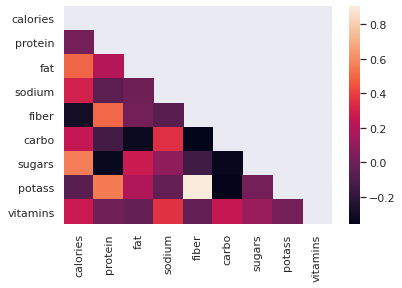

In [ ]:
# plot heatmap
sns.heatmap(cereal_corr, mask=mask);

In [ ]:
# adjust mask and df
adjusted_mask = mask[1:, :-1]
adjusted_cereal_corr = cereal_corr.iloc[1:,:-1]

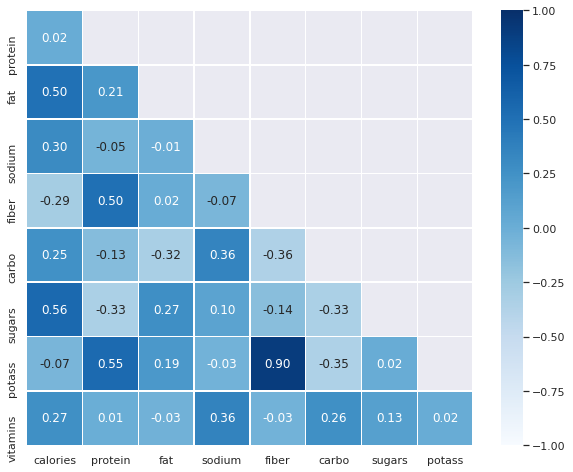

In [ ]:
fig, ax = plt.subplots(figsize=(10, 8))

# plot heatmap
sns.heatmap(adjusted_cereal_corr, mask=adjusted_mask,
            annot=True, fmt=".2f", cmap='Blues',
            vmin=-1, vmax=1, #Colorbar max and min
            linecolor='white', linewidth=0.5);

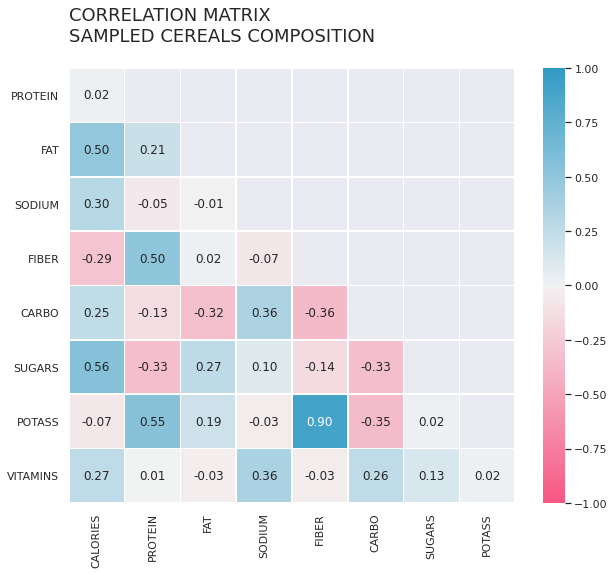

In [ ]:
fig, ax = plt.subplots(figsize=(10, 8))

#Correlations range from -1 to 1, so they have two directions,
#and in this case, a diverging palette works better than a sequential one
#.diverging_palette, it serves to build the colormaps we need with one color on each side, converging to another color in the center.

#That method uses HUSL colors, so you need hue, saturation, and lightness.
#I used hsluv.org to select the colors of this chart.
cmap = sns.diverging_palette(0, 230, 90, 60, as_cmap=True)

# plot heatmap
sns.heatmap(adjusted_cereal_corr, mask=adjusted_mask,
            annot=True, fmt=".2f", cmap=cmap,
            vmin=-1, vmax=1, #Colorbar max and min
            linecolor='white', linewidth=0.5);

# ticks > Upper Case for x-y lables
yticks = [i.upper() for i in adjusted_cereal_corr.index]
xticks = [i.upper() for i in adjusted_cereal_corr.columns]

ax.set_yticklabels(yticks, rotation=0)
ax.set_xticklabels(xticks, rotation=90)

# title
title = 'CORRELATION MATRIX\nSAMPLED CEREALS COMPOSITION\n'
ax.set_title(title, loc='left', fontsize=18);